# Metodos Numericos Notebook

Nombre: Anthony Alexander Contreras Carrión

Materia: Metodos Numericos

Fecha: 08-06-2023

### Contenido del Notebook

Este notebook forma parte esencial del proceso de aprendizaje en la materia de Métodos Numéricos. Utilizamos Python como herramienta principal para la escritura de código y la resolución de problemas matemáticos. A través de su uso, se logra una comprensión más profunda de los conceptos y métodos estudiados en el curso.

---

## 📚 **Índice de Contenidos**

### 🎯 **Fundamentos**

- **Métodos Analíticos**
- **Métodos Numéricos**
- **Exactitud vs Precisión**

### ⚠️ **Errores**

- **Tipos de Errores**
- **Cálculo de Error**
- **Representación Numérica (32 y 64 bits)**
- **Aritmética de Computador**

### 🎯 **Criterios de Control**

- **Convergencia, Divergencia y Tolerancia**
- **Criterios de Parada**

### 🔍 **Métodos de Búsqueda de Raíces**

- **Método de la Bisección**
- **Método de Newton (Newton-Raphson)**
- **Método de la Secante**
- **Método de Posición Falsa**

### 📈 **Interpolación y Aproximación**

- **Polinomio de Taylor**
- **Series de Maclaurin**
- **Polinomio de Lagrange**

### 🌊 **Métodos de Suavizado**

- **Spline Cúbico Natural**
- **Spline Cúbico Condicionado**

### 📊 **Ajuste de Datos**

- **Método de Mínimos Cuadrados**

# Como funciona este Notebook

En este notebook, utilizaremos la notación f(x) para representar funciones y df(x) para denotar sus derivadas. La variable n indicará el número de iteraciones que se realizarán al aplicar un método numérico con el fin de obtener una mejor aproximación de la raíz. Además, se considerarán otros criterios de parada, como el error, para determinar cuándo finalizar el proceso iterativo.

Se utilizara letras como a,b,c para representar los coeficientes de una ecuación cuadrática, y se empleará la notación de discriminante para evaluar las raíces de la ecuación.

Mientras que x y y son variables que se utilizarán para representar los valores de las funciones y sus derivadas en un rango determinado.

In [1]:
# Fundamentos

# función cuadratica de ejemplo para tener claro como funciona el concepto de función
def f(x):
    return x*x - 4*x + 4

# Rango de valores en los que se valua la funcion
for x in range(0, 6):
    print(f"f({x}) = {f(x)}")


f(0) = 4
f(1) = 1
f(2) = 0
f(3) = 1
f(4) = 4
f(5) = 9


In [15]:
# Metodos Analiticos
# Ecuación: x**2 - 5x + 6 = 0
a = 1
b = -5
c = 6

# Calculamos el discriminante
discriminante = b*b - 4*a*c

# Resolvemos con fórmula general
if discriminante >= 0:
    # Como el discriminante es una raíz exacta, se puede usar exponenciar
    raiz = discriminante ** 0.5
    x1 = (-b + raiz ) / (2*a)
    x2 = (-b - raiz ) / (2*a)
    print(f"Raíces: x1 = {x1}, x2 = {x2}")
else:
    print("La ecuación tiene raíces complejas.")



Raíces: x1 = 3.0, x2 = 2.0


In [12]:
# Metodos Numericos

def f(x):
    return x*x - 10*x + 4

# Metodo de la Biseccion ya visto en clase para este momento
def biseccion(a, b, tolerancia, iteraciones):
    if f(a) * f(b) >= 0: # Verificamos si el producto es positivo o cero
        print("No se puede aplicar el método de bisección.")
        return None

    n = 0
    while (b - a) / 2 > tolerancia and n < iteraciones:
        c = (a + b) / 2
        if f(c) == 0:
            return c
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c
        n += 1
    return (a + b) / 2

# Ejecutamos el metdodo de biseccion
raiz = biseccion(-1, 4, 0.001, 100)
# Aqui observamos nuestros criterios de parada tolerancia y numero de iteraciones
print(f"Raíz aproximada: {raiz}")


Raíz aproximada: 0.4178466796875


In [23]:
# Introduccion a lo Errores

# Valor real (por ejemplo, raíz de 2) aproximado manualmente
real = 2 ** 0.5

# Lista de valores aproximados
aprox = [1.4, 1.41, 1.414, 1.4142]

# error absoluto
for estimado in aprox:
    error = abs(real - estimado)
    print(f"Estimación: {estimado} | Error absoluto: {error}")


Estimación: 1.4 | Error absoluto: 0.014213562373095234
Estimación: 1.41 | Error absoluto: 0.004213562373095225
Estimación: 1.414 | Error absoluto: 0.00021356237309522186
Estimación: 1.4142 | Error absoluto: 1.3562373095243885e-05


In [24]:
# Tipo de Errores y su calculo

# Para este error vamos a utilizar el valor de raiz de 2 utilizado anteriormente

real = 2 ** 0.5

# Estimación numérica
aproximado = 1.414

# Error absoluto
error_absoluto = abs(real - aproximado)

# Error relativo
error_relativo = error_absoluto / abs(real)

# Error porcentual
error_porcentual = error_relativo * 100

print(f"Error absoluto: {error_absoluto}")
print(f"Error relativo: {error_relativo}")
print(f"Error porcentual: {error_porcentual}")


Error absoluto: 0.00021356237309522186
Error relativo: 0.00015101140222192286
Error porcentual: 0.015101140222192286


In [26]:
# IEEE 754 32 Bits

def decimal_a_ieee754(num):
    # Signo
    signo = 0 if num >= 0 else 1
    num = abs(num)

    # Parte entera y decimal
    parte_entera = int(num)
    parte_decimal = num - parte_entera

    # Convertimos parte entera a binario
    bin_entera = bin(parte_entera)[2:]

    # Convertimos parte decimal a binario
    bin_decimal = ''
    while len(bin_decimal) < 23:
        parte_decimal *= 2
        bit = int(parte_decimal)
        bin_decimal += str(bit)
        parte_decimal -= bit
        if parte_decimal == 0:
            break

    # Concatenamos parte entera y decimal
    bin_total = bin_entera + bin_decimal
    exponente = len(bin_entera) - 1
    mantisa = bin_total[1:24]

    # Calculamos el exponente con bias de 127
    exp_bin = bin(exponente + 127)[2:].zfill(8)


    ieee = str(signo) + exp_bin + mantisa.ljust(23, '0') #retornamos una cadena de bits
    return ieee


In [27]:
# Como funciona la funcion bin integrada nativamente en python
numero = 10
binario = bin(numero)

'''

Bin convierte un numero entero a su representación binaria en forma de string
10 = 0b1010 -> 0b indica que es un número binario

'''


print("Número decimal:", numero)
print("En binario:", binario)

Número decimal: 10
En binario: 0b1010


In [28]:
# IEEE 754 a Decimal
def ieee754_a_decimal(bits):
    signo = int(bits[0])
    exponente = int(bits[1:9], 2) - 127
    mantisa_bits = '1' + bits[9:]  # el 1 es implícito en IEEE

    # Reconstruimos el número
    valor = 0
    for i, bit in enumerate(mantisa_bits):
        valor += int(bit) * (2 ** (exponente - i))

    return -valor if signo == 1 else valor


In [29]:
# Decimal → IEEE
ieee = decimal_a_ieee754(12.375)
print("IEEE 754:", ieee)

# IEEE → Decimal
valor = ieee754_a_decimal(ieee)
print("Decimal:", valor)


IEEE 754: 01000001010001100000000000000000
Decimal: 12.375


In [30]:
# Aritmetica de Computador utilizando python

# Ejemplo típico de error por punto flotante
a = 0.1 + 0.2
b = 0.3

print(f"0.1 + 0.2 = {a}")
print(f"¿a == b?: {a == b}")
print(f"Diferencia real: {abs(a - b)}")


0.1 + 0.2 = 0.30000000000000004
¿a == b?: False
Diferencia real: 5.551115123125783e-17


In [31]:
'''

Metodo de Bissecion

Para el metodo de la biseccion se utiliza como guia el pseudocodigo proporcionado por el profesor durante las clases de metodos numericos, esta es una version simplificada del pseudocodigo utilizando python.

'''

import numpy as np
import matplotlib.pyplot as plt

'''Usamos matplotlib para graficar y numpy para generar el rango de valores que se evaluarán en la función.'''

def biseccion(f, a, b, tol, iter):

    """
    Método de Bisección para encontrar raíces de f(x) = 0
    Parámetros:
        f         : función a evaluar
        a, b      : extremos del intervalo inicial
        tol       : tolerancia aceptada
        iter  : número máximo de iteraciones
    Retorna:
        Aproximación de la raíz o None si no converge
    """

    i = 1
    FA = f(a)

    while i <= iter:
        p = a + (b - a) / 2
        FP = f(p)

        # Paso 4: Verificación de éxito
        if FP == 0 or (b - a) / 2 < tol:
            print(f"Procedimiento completado exitosamente en la iteración {i}.")
            return p

        i += 1

        # Paso 6: Determinar nuevo intervalo
        if FA * FP > 0:
            a = p
            FA = FP
        else:
            b = p

    # Paso 7: Si no converge
    print(f"El método fracasó después de {iter} iteraciones, N0 = {iter}")
    return None

In [32]:
def f(x):
    return x ** 3 - 7* x ** 2 + 14* x - 6

print(biseccion(f,0,1, 1e-2, 100))
print(biseccion(f,1,3.2, 1e-2, 100))
print(biseccion(f, 3.2,4, 1e-2, 100))

Procedimiento completado exitosamente en la iteración 7.
0.5859375
Procedimiento completado exitosamente en la iteración 8.
3.0023437500000005
Procedimiento completado exitosamente en la iteración 7.
3.41875


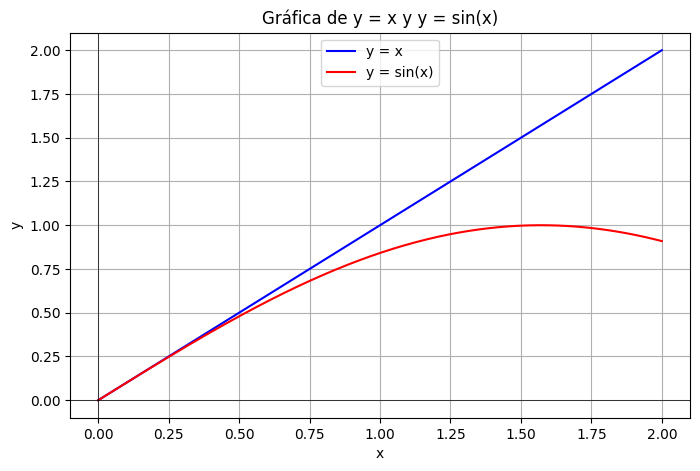

In [33]:
x = np.linspace(0, 2, 400)
y1 = x
y2 = np.sin(x)

# Graficar
plt.figure(figsize=(8, 5))
plt.plot(x, y1, label="y = x", color='blue')
plt.plot(x, y2, label="y = sin(x)", color='red')
plt.title("Gráfica de y = x y y = sin(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.show()

Procedimiento completado exitosamente en la iteración 17.
La raíz aproximada es: 1.8955001831054688


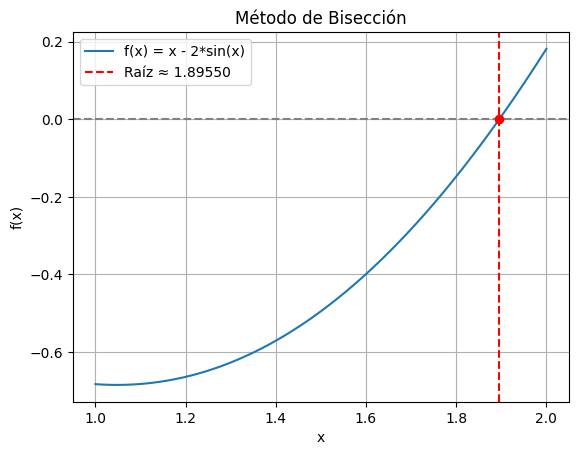

In [40]:
'''

En el ejemplo de arriba observamos dos funciones y = x y y = sin(x), las cuales se intersectan en un punto, el cual es la raiz de la funcion f(x) = x - 2 * sin(x).

'''

def f(x):
    return x - 2 * np.sin(x)

raiz = biseccion(f, 1, 2, 1e-5, 100)

if raiz is not None:
    print(f"La raíz aproximada es: {raiz}")

    # Graficamos la función en el intervalo [1, 2]
    x_vals = np.linspace(1, 2, 400)
    y_vals = f(x_vals)

    plt.plot(x_vals, y_vals, label="f(x) = x - 2*sin(x)")
    plt.axhline(0, color="gray", linestyle="--")
    plt.axvline(raiz, color="red", linestyle="--", label=f"Raíz ≈ {raiz:.5f}")
    plt.plot(raiz, f(raiz), 'ro')
    plt.title("Método de Bisección")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid(True)
    plt.show()

In [38]:
'''

Observamos que las dos funciones se intersecan en el punto 1,89 aprox en 17 iteraciones con los siguientes criterios de parada con una tolerancia 0.00005 y 100 iteraciones, los criterios de parada son realmente importantes ya que nos permiten tener mas precision y exactitud en el intervalo en el que estamos trabajando, si tuvieramos una tolerancia mayor seguramente este punto no fuera significativo.

'''

'\n\nObservamos que las dos funciones se intersecan en el punto 1,89 aprox en 17 iteraciones con los siguientes criterios de parada con una tolerancia 0.00005 y 100 iteraciones, los criterios de parada son realmente importantes ya que nos permiten tener mas precision y exactitud en el intervalo en el que estamos trabajando, si tuvieramos una tolerancia mayor seguramente este punto no fuera significativo.\n\n'

Convergencia alcanzada en la iteración 5.
La raíz aproximada es: 1.8954942670339812


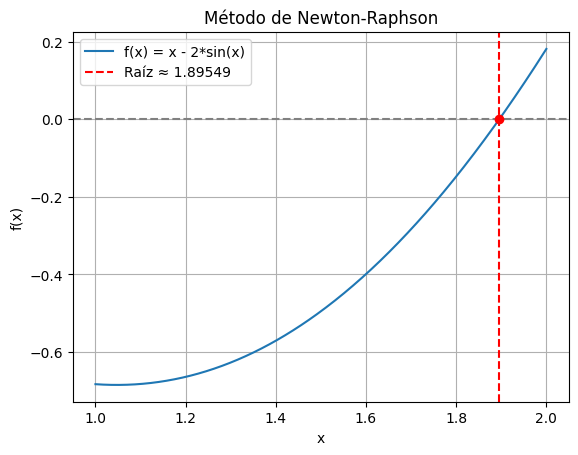

In [46]:
# Metodo de Newton
'''
Para el metodo de newton ya es necesario aplicar derivadas ya que de esta manera es mucho mas rapido encontrar soluciones precisas en el intervalo dado, no es necesario tener un rango de puntos para este intervalo pero si una buena aproximacion para realizar este metodo.

Tambien es bastante volatil si la derivada es cero en el punto que se esta evaluando, por lo que es importante tener en cuenta este detalle al momento de realizar el metodo de newton.

'''
def newton(f, df, x0, tol, iter):
    """
    Método de Newton-Raphson para encontrar raíces de f(x) = 0
    Parámetros:
        f        : función a evaluar
        df       : derivada de f
        x0       : valor inicial
        tol      : tolerancia aceptada
        iter : número máximo de iteraciones
    Retorna:
        Aproximación de la raíz o None si no converge
    """
    x = x0
    for i in range(1, iter + 1):
        fx = f(x)
        dfx = df(x)
        if dfx == 0:
            print("Derivada nula. Método detenido.")
            return None
        xn = x - fx / dfx
        if abs(xn - x) < tol:
            print(f"Convergencia alcanzada en la iteración {i}.")
            return xn
        x = xn
    print(f"El método fracasó después de {iter} iteraciones.")
    return None


# Funciones

def f(x):
    return x - 2 * np.sin(x)

def df(x):
    return 1 - 2 * np.cos(x)

# Parámetros para Newton-Raphson
x0 = 1.5
tol = 1e-5
max_iter = 100

raiz = newton(f, df, x0, tol, max_iter)

if raiz is not None:
    print(f"La raíz aproximada es: {raiz}")

    # Graficamos la función en un intervalo alrededor de la raíz
    x_vals = np.linspace(1, 2, 400)
    y_vals = f(x_vals)

    plt.plot(x_vals, y_vals, label="f(x) = x - 2*sin(x)")
    plt.axhline(0, color="gray", linestyle="--")
    plt.axvline(raiz, color="red", linestyle="--", label=f"Raíz ≈ {raiz:.5f}")
    plt.plot(raiz, f(raiz), 'ro')
    plt.title("Método de Newton-Raphson")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("No se pudo encontrar la raíz.")


In [48]:
'''
Observamos que la convergencia con este metodo es mucho mas rapida debido a que utiliza derivadas para encontrar la raiz de la funcion, en este caso la raiz es 1.8955 aprox en 5 iteraciones con una tolerancia de 0.00001 y un maximo de 100 iteraciones, no obstante este metodo es mucho mas complejo ya que tenemos mas operaciones implicadas en la derivada y en metodos numericos buscamos la sencillez y eficiencia, por lo que es importante tener en cuenta este detalle al momento de elegir el metodo a utilizar.
'''

'\nObservamos que la convergencia con este metodo es mucho mas rapida debido a que utiliza derivadas para encontrar la raiz de la funcion, en este caso la raiz es 1.8955 aprox en 5 iteraciones con una tolerancia de 0.00001 y un maximo de 100 iteraciones, no obstante este metodo es mucho mas complejo ya que tenemos mas operaciones implicadas en la derivada y en metodos numericos buscamos la sencillez y eficiencia, por lo que es importante tener en cuenta este detalle al momento de elegir el metodo a utilizar.\n'

Convergencia alcanzada en la iteración 5.
La raíz aproximada es: 1.895494266655171


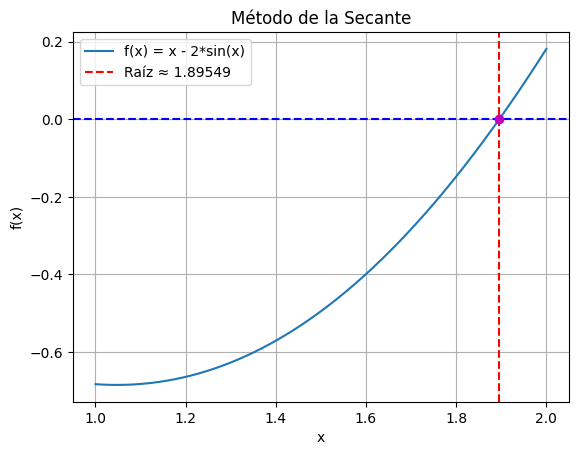

In [49]:
# Metodo de la Secante

'''
Para el metodo de la secante no es necesario calcular la derivada de la funcion, sino que se utilizan dos puntos iniciales para aproximar la raiz de la funcion, este metodo es bastante similar al metodo de newton pero no requiere el calculo de la derivada, lo que lo hace mas sencillo de implementar en algunos casos.
'''

def secante(f, x0, x1, tol, iter):
    """
    Método de la Secante para encontrar raíces de f(x) = 0
    Parámetros:
        f        : función a evaluar
        x0, x1   : dos valores iniciales
        tol      : tolerancia aceptada
        iter : número máximo de iteraciones
    Retorna:
        Aproximación de la raíz o None si no converge
    """
    for i in range(1, iter + 1):
        f0 = f(x0)
        f1 = f(x1)
        if f1 - f0 == 0:
            print("División por cero. Método detenido.")
            return None
        x2 = x1 - f1 * (x1 - x0) / (f1 - f0)
        if abs(x2 - x1) < tol:
            print(f"Convergencia alcanzada en la iteración {i}.")
            return x2
        x0, x1 = x1, x2
    print(f"El método fracasó después de {iter} iteraciones.")
    return None



# Ejemplo

x0 = 1.0
x1 = 2.0
tol = 1e-5
max_iter = 100

raiz = secante(f, x0, x1, tol, max_iter)

if raiz is not None:
    print(f"La raíz aproximada es: {raiz}")

    # Graficamos la función en un intervalo alrededor de la raíz
    x_vals = np.linspace(1, 2, 400)
    y_vals = f(x_vals)

    plt.plot(x_vals, y_vals, label="f(x) = x - 2*sin(x)")
    plt.axhline(0, color="blue", linestyle="--")
    plt.axvline(raiz, color="red", linestyle="--", label=f"Raíz ≈ {raiz:.5f}")
    plt.plot(raiz, f(raiz), 'mo')  # punto morado
    plt.title("Método de la Secante")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("No se pudo encontrar la raíz.")

In [50]:
'''
Al igual que en el metodo de newton tenemos una convergencia bastante rapida, en este caso la raiz es 1.8955 aprox en 5 iteraciones con una tolerancia de 0.00001 y un maximo de 100 iteraciones, lo que lo hace bastante eficiente para encontrar raices de funciones sin necesidad de calcular derivadas, lo que lo hace mas sencillo de implementar en algunos casos, pero siempre teniendo en cuenta una buena aproximacion incial.
'''

'\nAl igual que en el metodo de newton tenemos una convergencia bastante rapida, en este caso la raiz es 1.8955 aprox en 5 iteraciones con una tolerancia de 0.00001 y un maximo de 100 iteraciones, lo que lo hace bastante eficiente para encontrar raices de funciones sin necesidad de calcular derivadas, lo que lo hace mas sencillo de implementar en algunos casos, pero siempre teniendo en cuenta una buena aproximacion incial.\n'

Convergencia alcanzada en la iteración 5.
La raíz aproximada es: 1.895493122192076


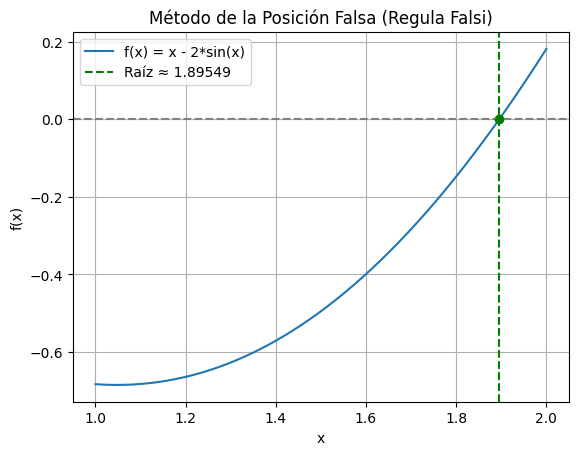

In [68]:
# Metodo de Posicion Falsa

'''
El metodo de la posicion falsa es bastante similar al metodo de la secante pero en este metodo un punto se queda fijo y el otro se va moviendo, lo que lo hace mas sencillo de implementar en algunos casos, pero siempre teniendo en cuenta una buena aproximacion incial, la malo de este metodo que en casi todos los casos un punto se queda fijo.
'''

def falsa_posicion(f, a, b, tol, iter):
    """
    Método de la Posición Falsa para encontrar raíces de f(x) = 0
    Parámetros:
        f        : función a evaluar
        a, b     : extremos del intervalo inicial
        tol      : tolerancia aceptada
        iter : número máximo de iteraciones
    Retorna:
        Aproximación de la raíz o None si no converge
    """
    fa = f(a)
    fb = f(b)

    if fa * fb > 0:
        print("La función no cambia de signo en el intervalo.")
        return None

    for i in range(1, iter + 1):
        p = b - fb * (b - a) / (fb - fa)
        fp = f(p)

        if fp == 0 or abs(fp) < tol:
            print(f"Convergencia alcanzada en la iteración {i}.")
            return p

        if fa * fp < 0:
            b = p
            fb = fp
        else:
            a = p
            fa = fp

    print(f"El método fracasó después de {iter} iteraciones.")
    return None

# Ejemplo


def f(x):
    return x - 2 * np.sin(x)

a = 1.0
b = 2.0
tol = 1e-5
max_iter = 100

raiz = falsa_posicion(f, a, b, tol, max_iter)

if raiz is not None:
    print(f"La raíz aproximada es: {raiz}")

    # Graficamos la función en un intervalo alrededor de la raíz
    x_vals = np.linspace(1, 2, 400)
    y_vals = f(x_vals)

    plt.plot(x_vals, y_vals, label="f(x) = x - 2*sin(x)")
    plt.axhline(0, color="gray", linestyle="--")
    plt.axvline(raiz, color="green", linestyle="--", label=f"Raíz ≈ {raiz:.5f}")
    plt.plot(raiz, f(raiz), 'go')  # punto verde
    plt.title("Método de la Posición Falsa (Regula Falsi)")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("No se pudo encontrar la raíz.")


In [67]:
'''
Metodos de Interpolacion y Aproximacion

Los métodos de interpolación y aproximación son técnicas utilizadas para estimar valores de una función en puntos no conocidos, basándose en valores conocidos. Estos métodos son fundamentales en el análisis numérico y tienen aplicaciones en diversas áreas como la ingeniería, la física y la economía.
'''

'\nMetodos de Interpolacion y Aproximacion\n\nLos métodos de interpolación y aproximación son técnicas utilizadas para estimar valores de una función en puntos no conocidos, basándose en valores conocidos. Estos métodos son fundamentales en el análisis numérico y tienen aplicaciones en diversas áreas como la ingeniería, la física y la economía.\n'

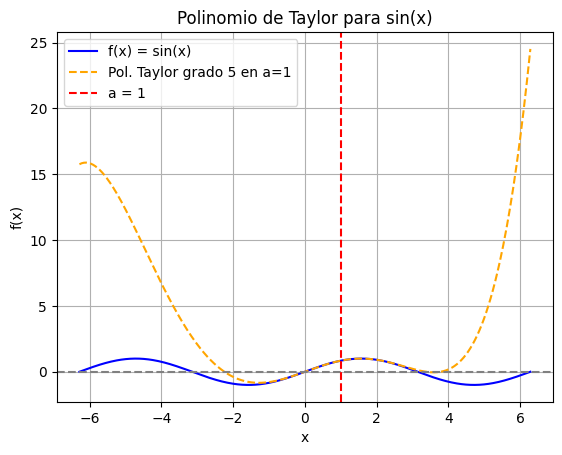

In [64]:
import math

def f(x):
    return np.sin(x)

def derivadas_sin(n, x):
    """
    Para este caso vamos a utilizar un ejemplo sencillo donde la derivas van a estar en los valores sen y cos de x
    """
    funcs = [np.sin, np.cos, lambda x: -np.sin(x), lambda x: -np.cos(x)]
    return funcs[n % 4](x)

def taylor_sin(x, a, n):
    taylor = 0
    for k in range(n + 1):
        deriv_k = derivadas_sin(k, a)
        taylor += deriv_k * ((x - a) ** k) / math.factorial(k)
    return taylor

# Parámetros
a = 1
n = 5
x_vals = np.linspace(-2 * np.pi, 2 * np.pi, 400)
y_original = f(x_vals)
y_taylor = taylor_sin(x_vals, a, n)

# Gráfica
plt.plot(x_vals, y_original, label="f(x) = sin(x)", color='blue')
plt.plot(x_vals, y_taylor, '--', label=f"Pol. Taylor grado {n} en a={a}", color='orange')
plt.title("Polinomio de Taylor para sin(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.axhline(0, color="gray", linestyle="--")
plt.axvline(a, color="red", linestyle="--", label=f"a = {a}")
plt.legend()
plt.show()



In [66]:
'''
Observamos que al ser un polinomio nuestra grafica cambia considerablemente, ya que el polinomio de taylor es una aproximacion de la funcion en un punto especifico, en este caso a = 1, y al ser un polinomio de grado 5 la aproximacion es bastante buena, pero si aumentamos el grado del polinomio la aproximacion sera mejor, pero tambien tendremos mas terminos en el polinomio lo que lo hace mas complejo.
'''

'\nObservamos que al ser un polinomio nuestra grafica cambia considerablemente, ya que el polinomio de taylor es una aproximacion de la funcion en un punto especifico, en este caso a = 1, y al ser un polinomio de grado 5 la aproximacion es bastante buena, pero si aumentamos el grado del polinomio la aproximacion sera mejor, pero tambien tendremos mas terminos en el polinomio lo que lo hace mas complejo.\n'

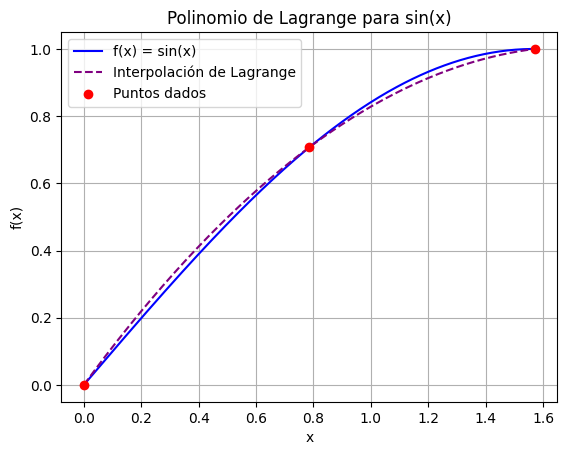

In [69]:
# Polinomio de Lagrange

def lagrange_interpol(x_vals, x, y):
    """
    Interpolación de Lagrange para un conjunto de puntos dados.
    :param x_vals: Valores de x donde se evalúa el polinomio
    :param x: Valores conocidos de x
    :param y: Valores conocidos de y correspondientes a x_puntos
    :return: Numero decimal
    """
    n = len(x)
    resultado = 0
    for i in range(n):
        term = y[i]
        for j in range(n):
            if i != j:
                term *= (x_vals - x[j]) / (x[i] - x[j])
        resultado += term
    return resultado

# Puntos conocidos
x_puntos = np.array([0, np.pi/4, np.pi/2])
y_puntos = np.sin(x_puntos)

x_vals = np.linspace(0, np.pi/2, 400)
y_lagrange = lagrange_interpol(x_vals, x_puntos, y_puntos)

# Gráfica
plt.plot(x_vals, np.sin(x_vals), label="f(x) = sin(x)", color='blue')
plt.plot(x_vals, y_lagrange, '--', label="Interpolación de Lagrange", color='purple')
plt.scatter(x_puntos, y_puntos, color='red', zorder=5, label="Puntos dados")
plt.title("Polinomio de Lagrange para sin(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()


In [65]:
'''
En este metodo para calcular Pn(x) solo es necesario tener una lista de puntos lo cual no es para nada complejo, lo complejo viene cuando tenemos que derivar la funcion hasta el grado n, lo que puede ser bastante tedioso, pero al ser un polinomio de grado n la aproximacion es bastante buena, y al ser un polinomio de grado n la complejidad del polinomio aumenta, pero la aproximacion es mejor.
'''

'\nEn este metodo para calcular Pn(x) solo es necesario tener una lista de puntos lo cual no es para nada complejo, lo complejo viene cuando tenemos que derivar la funcion hasta el grado n, lo que puede ser bastante tedioso, pero al ser un polinomio de grado n la aproximacion es bastante buena, y al ser un polinomio de grado n la complejidad del polinomio aumenta, pero la aproximacion es mejor.\n'

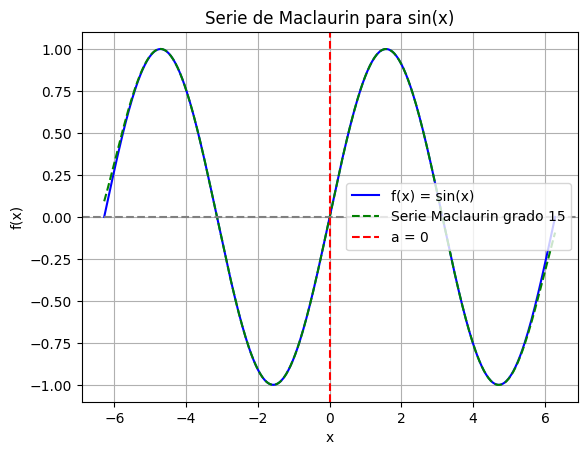

In [71]:
# Metodo de Maclaurin
'''
El metodo de maclaurin es un caso especial del polinomio de taylor, donde el punto a es 0.
'''

def maclaurin_sin(x_vals, n):
    """
    Serie de Maclaurin para sin(x), es un caso especial del polinomio de Taylor.
    :param x_vals: Valores de x
    :param n: Numero de iteraciones
    :return: Serie de Maclaurin evaluada en x_vals
    """
    serie = 0
    for k in range(n + 1):
        coef = (-1)**k
        serie += coef * (x_vals**(2*k + 1)) / math.factorial(2*k + 1)
    return serie

# Parámetros
n = 7
x_vals = np.linspace(-2*np.pi, 2*np.pi, 400)
y_maclaurin = maclaurin_sin(x_vals, n)

# Gráfica
plt.plot(x_vals, np.sin(x_vals), label="f(x) = sin(x)", color='blue')
plt.plot(x_vals, y_maclaurin, '--', label=f"Serie Maclaurin grado {2*n+1}", color='green')
plt.title("Serie de Maclaurin para sin(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.axhline(0, color="gray", linestyle="--")
plt.axvline(0, color="red", linestyle="--", label="a = 0")
plt.legend()
plt.show()


In [72]:
'''
Como vemos la grafica es totalmente diferente a la de taylor, ya que al ser un polinomio de grado n la aproximacion es bastante buena, pero al ser un caso especial de taylor notamos la diferencia en su grafica y resultado .
'''

'\nComo vemos la grafica es totalmente diferente a la de taylor, ya que al ser un polinomio de grado n la aproximacion es bastante buena, pero al ser un caso especial de taylor notamos la diferencia en su grafica y resultado .\n'

In [74]:

'''
Splines Cubicos

Los splines cubicos son una técnica de interpolación que utiliza polinomios cúbicos para conectar puntos de datos. Son especialmente útiles cuando se requiere suavidad en la curva resultante, ya que garantizan continuidad en la primera y segunda derivada entre los segmentos de polinomios.
'''

'\nSplines Cubicos\n\nLos splines cubicos son una técnica de interpolación que utiliza polinomios cúbicos para conectar puntos de datos. Son especialmente útiles cuando se requiere suavidad en la curva resultante, ya que garantizan continuidad en la primera y segunda derivada entre los segmentos de polinomios.\n'

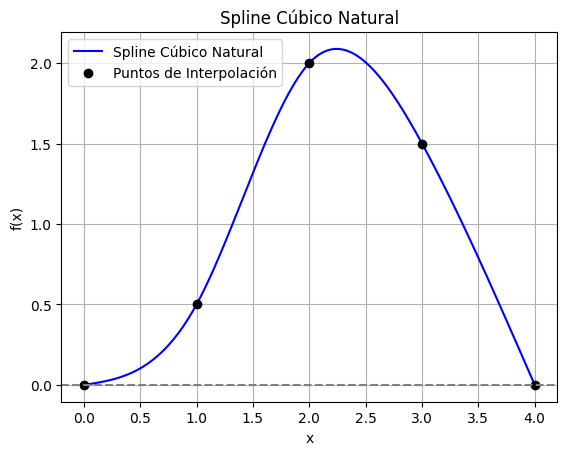

In [75]:
import matplotlib.pyplot as plt

def spline_cubico_natural(x, y):
    """
    Método de Spline Cúbico Natural para interpolar puntos dados.

    :param x: Lista de coordenadas x de los puntos.
    :param y: Lista de coordenadas y de los puntos.
    :return: Gráfica de la interpolación por Spline Cúbico Natural.
    """
    n = len(x) - 1
    h = [x[i+1] - x[i] for i in range(n)]

    # Construir el sistema lineal
    A = [[0.0 for _ in range(n+1)] for _ in range(n+1)]
    b = [0.0 for _ in range(n+1)]

    A[0][0] = 1.0
    A[n][n] = 1.0

    for i in range(1, n):
        A[i][i-1] = h[i-1]
        A[i][i]   = 2 * (h[i-1] + h[i])
        A[i][i+1] = h[i]
        b[i] = 3 * ((y[i+1] - y[i]) / h[i] - (y[i] - y[i-1]) / h[i-1])

    # Resolver el sistema (eliminación gaussiana simple)
    def resolver_sistema(A, b):
        n = len(b)
        for i in range(n):
            fila = max(range(i, n), key=lambda r: abs(A[r][i]))
            A[i], A[fila] = A[fila], A[i]
            b[i], b[fila] = b[fila], b[i]

            factor = A[i][i]
            for j in range(i, n):
                A[i][j] /= factor
            b[i] /= factor

            for k in range(i+1, n):
                f = A[k][i]
                for j in range(i, n):
                    A[k][j] -= f * A[i][j]
                b[k] -= f * b[i]

        # Sustitución hacia atrás
        sus = [0.0 for _ in range(n)]
        for i in range(n-1, -1, -1):
            sus[i] = b[i] - sum(A[i][j] * sus[j] for j in range(i+1, n))
        return sus

    c = resolver_sistema(A, b)

    # Calcular coeficientes a, b, c, d
    a = y[:-1]
    b_coef = []
    d = []

    for i in range(n):
        bi = (y[i+1] - y[i]) / h[i] - h[i] * (2*c[i] + c[i+1]) / 3
        di = (c[i+1] - c[i]) / (3*h[i])
        b_coef.append(bi)
        d.append(di)

    # Evaluar en un conjunto de puntos
    x_vals = []
    y_vals = []
    for i in range(n):
        xi = x[i]
        xf = x[i+1]
        step = (xf - xi) / 50
        for j in range(51):
            xt = xi + j * step
            dx = xt - x[i]
            yt = a[i] + b_coef[i]*dx + c[i]*dx**2 + d[i]*dx**3
            x_vals.append(xt)
            y_vals.append(yt)

    # Graficar
    plt.plot(x_vals, y_vals, label="Spline Cúbico Natural", color="blue")
    plt.plot(x, y, 'ko', label="Puntos de Interpolación")
    plt.axhline(0, color='gray', linestyle='--')
    plt.title("Spline Cúbico Natural")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Ejemplo
x = [0, 1, 2, 3, 4]
y = [0, 0.5, 2.0, 1.5, 0]
spline_cubico_natural(x, y)


In [ ]:
'''En este ejemplo, hemos implementado un spline cúbico natural que interpola los puntos dados. El spline es suave y continuo, y se ajusta a los puntos de datos sin necesidad de condiciones adicionales en los extremos.'''

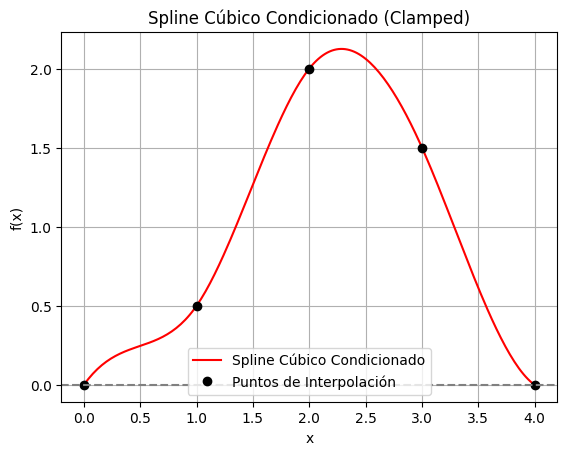

In [76]:
import matplotlib.pyplot as plt

def spline_cubico_condicionado(x, y, fp0, fpn):
    """
    Spline cúbico condicionado con derivadas especificadas en los extremos.

    :param x: lista de puntos x
    :param y: lista de puntos y
    :param fp0: derivada en el primer punto (x[0])
    :param fpn: derivada en el último punto (x[-1])
    """
    n = len(x) - 1
    h = [x[i+1] - x[i] for i in range(n)]

    # Construir sistema lineal
    A = [[0.0 for _ in range(n+1)] for _ in range(n+1)]
    b = [0.0 for _ in range(n+1)]

    # Condición en el primer extremo
    A[0][0] = 2 * h[0]
    A[0][1] = h[0]
    b[0] = 3 * ((y[1] - y[0]) / h[0] - fp0)

    # Condición en el último extremo
    A[n][n-1] = h[n-1]
    A[n][n] = 2 * h[n-1]
    b[n] = 3 * (fpn - (y[n] - y[n-1]) / h[n-1])

    # Ecuaciones internas
    for i in range(1, n):
        A[i][i-1] = h[i-1]
        A[i][i] = 2 * (h[i-1] + h[i])
        A[i][i+1] = h[i]
        b[i] = 3 * ((y[i+1] - y[i]) / h[i] - (y[i] - y[i-1]) / h[i-1])

    # Resolver sistema con eliminación gaussiana, se puede aplicar gauss jordan pero toma mas tiempo

    def resolver_sistema(A, b):
        n = len(b)
        for i in range(n):
            fila = max(range(i, n), key=lambda r: abs(A[r][i]))
            A[i], A[fila] = A[fila], A[i]
            b[i], b[fila] = b[fila], b[i]
            factor = A[i][i]
            for j in range(i, n):
                A[i][j] /= factor
            b[i] /= factor
            for k in range(i+1, n):
                f = A[k][i]
                for j in range(i, n):
                    A[k][j] -= f * A[i][j]
                b[k] -= f * b[i]

        sus = [0.0 for _ in range(n)]
        for i in range(n-1, -1, -1):
            sus[i] = b[i] - sum(A[i][j] * sus[j] for j in range(i+1, n))
        return sus

    c = resolver_sistema(A, b)

    # Calcular coeficientes a, b, c, d
    a = y[:-1]
    b_coef = []
    d = []
    for i in range(n):
        bi = (y[i+1] - y[i]) / h[i] - h[i] * (2 * c[i] + c[i+1]) / 3
        di = (c[i+1] - c[i]) / (3 * h[i])
        b_coef.append(bi)
        d.append(di)

    # Evaluar spline
    x_vals = []
    y_vals = []
    for i in range(n):
        xi = x[i]
        xf = x[i+1]
        step = (xf - xi) / 50
        for j in range(51):
            xt = xi + j * step
            dx = xt - x[i]
            yt = a[i] + b_coef[i] * dx + c[i] * dx**2 + d[i] * dx**3
            x_vals.append(xt)
            y_vals.append(yt)

    # Graficar
    plt.plot(x_vals, y_vals, label="Spline Cúbico Condicionado", color="red")
    plt.plot(x, y, 'ko', label="Puntos de Interpolación")
    plt.axhline(0, color='gray', linestyle='--')
    plt.title("Spline Cúbico Condicionado (Clamped)")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Ejemplo de uso
x = [0, 1, 2, 3, 4]
y = [0, 0.5, 2.0, 1.5, 0]

# Derivadas en los extremos (pueden ser calculadas o estimadas)
fp0 = 1.0  # derivada en x=0
fpn = -0.5 # derivada en x=4

spline_cubico_condicionado(x, y, fp0, fpn)


In [ ]:
'''En este ejemplo, hemos implementado un spline cúbico condicionado que interpola los puntos dados y tiene derivadas especificadas en los extremos. Esto permite un mayor control sobre la forma de la curva, lo que es útil en aplicaciones donde se requiere suavidad y continuidad en los extremos.

Aunque en esta grafica observamos un compartmiento de la curva en los extremos, esto es debido a que las derivadas especificadas en los extremos no son las mismas que las derivadas de la funcion original, por lo que la curva se ajusta a los puntos dados y a las derivadas especificadas, lo que puede ser util en algunos casos pero no en todos.

'''

In [ ]:
'''
Metodo de Minimos Cuadrados

El método de mínimos cuadrados es una técnica estadística utilizada para ajustar un modelo a un conjunto de datos. Su objetivo es minimizar la suma de los cuadrados de las diferencias entre los valores observados y los valores predichos por el modelo. Este método es ampliamente utilizado en regresión lineal, donde se busca encontrar la mejor línea que se ajuste a los datos.
'''

Coeficientes del polinomio ajustado:
a_0 = 1.485714
a_1 = -1.271429
a_2 = 0.642857


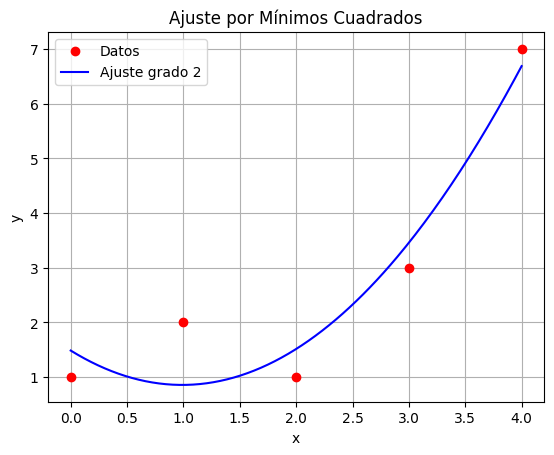

In [77]:
import numpy as np
import matplotlib.pyplot as plt

def minimos_cuadrados(x, y, grado):
    """
    Ajusta un polinomio de 'grado' a los puntos dados usando el Método de Mínimos Cuadrados.
    """
    # Construir la matriz de diseño X
    X = np.vander(x, grado + 1, increasing=True)  # Matriz X con x^0, x^1, ..., x^grado
    Y = np.array(y)

    # Resolver el sistema normal: (X^T X) c = (X^T y)
    A = X.T @ X
    b = X.T @ Y

    coeficientes = np.linalg.solve(A, b)  # Solución del sistema

    # Mostrar el polinomio ajustado
    print("Coeficientes del polinomio ajustado:")
    for i, c in enumerate(coeficientes):
        print(f"a_{i} = {c:.6f}")

    # Graficar
    x_plot = np.linspace(min(x), max(x), 200)
    y_plot = sum(coeficientes[i] * x_plot**i for i in range(len(coeficientes)))

    plt.plot(x, y, 'ro', label="Datos")
    plt.plot(x_plot, y_plot, 'b-', label=f"Ajuste grado {grado}")
    plt.title("Ajuste por Mínimos Cuadrados")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.legend()
    plt.show()

# Ejemplo
x = [0, 1, 2, 3, 4]
y = [1, 2, 1, 3, 7]
minimos_cuadrados(x, y, grado=2)


In [78]:
'''
En el metodo de minimos cuadrados buscamos graficar una linea mas proxima por todos los puntos generando un error cuadratico, lo que nos permite encontrar una linea que se ajuste a los puntos dados, en este caso el polinomio de grado 2 se ajusta bastante bien a los puntos dados, pero si aumentamos el grado del polinomio la aproximacion sera mejor, pero tambien tendremos mas terminos en el polinomio lo que lo hace mas complejo.
'''

'\nEn el metodo de minimos cuadrados buscamos graficar una linea mas proxima por todos los puntos generando un error cuadratico, lo que nos permite encontrar una linea que se ajuste a los puntos dados, en este caso el polinomio de grado 2 se ajusta bastante bien a los puntos dados, pero si aumentamos el grado del polinomio la aproximacion sera mejor, pero tambien tendremos mas terminos en el polinomio lo que lo hace mas complejo.\n'

In [79]:
'''
Actualizado
'''

'\nActualizado\n'